In [53]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from random import randint
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [54]:
X = load_boston().data
Y = load_boston().target

In [55]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [56]:
clf = SGDRegressor()
clf.fit(X, Y)

print(mean_squared_error(Y, clf.predict(X)))

22.72411510744886


In [57]:
class CustomRegSGD():
    
    def __init__(self, step_size=1, batch_size=10, max_iter=100):
        self.step_size = step_size
        self.batch_size = batch_size
        self.max_iter = max_iter
    
    def fit(self, X, Y):
        d1, d2 = X.shape
        w = np.random.randn(1, d2)
        b = np.random.randn(1)
        
        for i in range(self.max_iter):
            # sample random data
            batch_sample = np.random.randint(0, d1 - 1, self.batch_size)                        
            batch_X = X[batch_sample, :]    
            batch_Y = Y[batch_sample, np.newaxis]
            
            # compute gradients
            pred = (batch_X @ w.T)
            w_grad = (-2 / self.batch_size) * (batch_Y - pred - b).T @ batch_X
            b_grad = (-2 / self.batch_size) * (batch_Y - pred - b)
        
            w -= self.step_size * w_grad
            b -= self.step_size * np.sum(b_grad)
        
        self.w_ = np.squeeze(w)
        self.b_ = b
    
    def predict(self, X):
        pred = X @ self.w_.T + self.b_
        return pred

## 1 Predicted vs Actual

### 1.1 Custom SGD

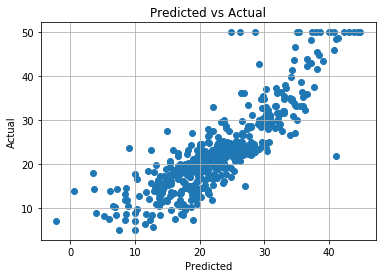

In [58]:
custom_clf = CustomRegSGD(0.1, 80, 100)
custom_clf.fit(X,Y)

pred = custom_clf.predict(X)

plt.title('Predicted vs Actual')

plt.xlabel('Predicted')
plt.ylabel("Actual")

plt.scatter(pred, Y)

plt.grid()
plt.show()

### 1.2 Sklearn SGD

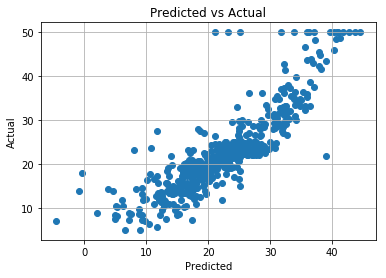

In [59]:
# Remove bias term on training set for sklearn
pred = clf.predict(X)

plt.title('Predicted vs Actual')

plt.xlabel('Predicted')
plt.ylabel("Actual")

plt.scatter(pred, Y)

plt.grid()
plt.show()

## 2 MSE Comparison

In [60]:
mse = round(mean_squared_error(Y, clf.predict(X)), 4)
mse_custom_sgd = round(mean_squared_error(Y, custom_clf.predict(X)), 4)

print('Sklearn SGD MSE: {}'.format(mse))
print('Custom SGD MSE: {}'.format(mse_custom_sgd))

Sklearn SGD MSE: 22.7241
Custom SGD MSE: 23.4634


## 3 Comparison of weights side-by-side

In [61]:
weights = PrettyTable()
weights.field_names = ["Sklearn SGD Weight", "Custom SGD Weight", "Difference"]
sk_weights = clf.coef_


for i in range(len(sk_weights)):
    sk_w = round(sk_weights[i], 4)    
    custom_w = round(custom_clf.w_[i], 4)
    diff = abs(round(sk_w - custom_w, 4))
    
    weights.add_row([sk_w, custom_w, diff])
    
print(weights)

+--------------------+-------------------+------------+
| Sklearn SGD Weight | Custom SGD Weight | Difference |
+--------------------+-------------------+------------+
|      -0.6515       |      -0.7786      |   0.1271   |
|       0.7281       |       1.1176      |   0.3895   |
|       -0.472       |       0.249       |   0.721    |
|       0.8381       |       0.9843      |   0.1462   |
|      -1.0239       |      -1.7923      |   0.7684   |
|       3.1158       |       2.9049      |   0.2109   |
|      -0.3187       |       0.2955      |   0.6142   |
|      -2.3488       |      -3.1403      |   0.7915   |
|       0.8354       |       2.2916      |   1.4562   |
|      -0.4973       |      -1.2286      |   0.7313   |
|      -1.7991       |      -2.0568      |   0.2577   |
|       0.8715       |       0.3844      |   0.4871   |
|      -3.5724       |      -3.9707      |   0.3983   |
+--------------------+-------------------+------------+
